## Executive Summary

"The period between 1970 and 1982 marked a significant shift in the United States car industry. American production shifted from heavy, powerful six- and eight-cylinder cars with poor gas mileage to lighter, less powerful, four-cylinder cars with higher fuel efficiency. The global auto industry–including Americans and their European and Japanese competitors–raised overall miles per gallon (MPG) by focusing on four-cylinder cars and making them more fuel efficient." 

Reference>
David K, S. (2016, July 26). RPubs - Cars Dataset. Https://Www.Rpubs.Com/Dksmith01/Cars. https://www.rpubs.com/dksmith01/cars

In [69]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Set the plots to display in the Jupyter Notebook.
%matplotlib inline


# change plotting colors per client request
plt.style.use('ggplot')

In [70]:
cars_df= pd.read_csv('../data/cars.csv', sep=';')

In [71]:
cars_df.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,STRING,DOUBLE,INT,DOUBLE,DOUBLE,DOUBLE,DOUBLE,INT,CAT
1,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.,12.0,70,US
2,Buick Skylark 320,15.0,8,350.0,165.0,3693.,11.5,70,US
3,Plymouth Satellite,18.0,8,318.0,150.0,3436.,11.0,70,US
4,AMC Rebel SST,16.0,8,304.0,150.0,3433.,12.0,70,US


In [72]:
cars_df.shape

(407, 9)

### Rename the Origin column ('Origin') with the following: 'US':1, 'Europe':2, and 'Japan':3

In [73]:
cars_df['Origin'] = cars_df.Origin.map({'US':1, 'Europe':2, 'Japan':3})

In [74]:
cars_df.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,STRING,DOUBLE,INT,DOUBLE,DOUBLE,DOUBLE,DOUBLE,INT,NaN
1,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.,12.0,70,1.0
2,Buick Skylark 320,15.0,8,350.0,165.0,3693.,11.5,70,1.0
3,Plymouth Satellite,18.0,8,318.0,150.0,3436.,11.0,70,1.0
4,AMC Rebel SST,16.0,8,304.0,150.0,3433.,12.0,70,1.0


In [75]:
# Look at the information regarding its columns.
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car           407 non-null    object 
 1   MPG           407 non-null    object 
 2   Cylinders     407 non-null    object 
 3   Displacement  407 non-null    object 
 4   Horsepower    407 non-null    object 
 5   Weight        407 non-null    object 
 6   Acceleration  407 non-null    object 
 7   Model         407 non-null    object 
 8   Origin        406 non-null    float64
dtypes: float64(1), object(8)
memory usage: 28.7+ KB


### Using Index

In [76]:
# displaying the index as it sits (auto-generated upon import)
cars_df.index

RangeIndex(start=0, stop=407, step=1)

In [77]:
# also note that our auto-generated index has no name
print(cars_df.index.name)

None


In [78]:
#Change the name of Index
cars_df.index.name = 'ID' 
cars_df.head(3)

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
ID,,,,,,,,,
0,STRING,DOUBLE,INT,DOUBLE,DOUBLE,DOUBLE,DOUBLE,INT,NaN
1,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.,12.0,70,1.0
2,Buick Skylark 320,15.0,8,350.0,165.0,3693.,11.5,70,1.0


### Checking for missing value
Subset on the rows containing missing release years using the command .isnull() on the release column and the resulting boolean list for filtering.

In [79]:
cars_df.isnull().sum()

Car             0
MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model           0
Origin          1
dtype: int64

In [86]:
cars_df['Origin'] = cars_df['Origin'].fillna(0)

In [87]:
cars_df.isnull().sum()

Car             0
MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model           0
Origin          0
dtype: int64

### Clean up the column names

In [88]:
rename_map = {
    # Original column: [renamed column]
    'MPG':    'MilesPerGallon', 
    'Model': 'ModelYear'
}

cars_df.rename(columns=rename_map, inplace=True)
cars_df.head(4)

,Car,MilesPerGallon,Cylinders,Displacement,Horsepower,Weight,Acceleration,ModelYear,Origin
ID,,,,,,,,,
0,STRING,DOUBLE,INT,DOUBLE,DOUBLE,DOUBLE,DOUBLE,INT,0.0
1,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.,12.0,70,1.0
2,Buick Skylark 320,15.0,8,350.0,165.0,3693.,11.5,70,1.0
3,Plymouth Satellite,18.0,8,318.0,150.0,3436.,11.0,70,1.0


### Converting to a appropriate format

In [89]:
cars_df.MilesPerGallon.unique()

array(['DOUBLE', '18.0', '15.0', '16.0', '17.0', '14.0', '0', '24.0',
       '22.0', '21.0', '27.0', '26.0', '25.0', '10.0', '11.0', '9.0',
       '28.0', '19.0', '12.0', '13.0', '23.0', '30.0', '31.0', '35.0',
       '20.0', '29.0', '32.0', '33.0', '17.5', '15.5', '14.5', '22.5',
       '24.5', '18.5', '29.5', '26.5', '16.5', '31.5', '36.0', '25.5',
       '33.5', '20.5', '30.5', '21.5', '43.1', '36.1', '32.8', '39.4',
       '19.9', '19.4', '20.2', '19.2', '25.1', '20.6', '20.8', '18.6',
       '18.1', '17.7', '27.5', '27.2', '30.9', '21.1', '23.2', '23.8',
       '23.9', '20.3', '21.6', '16.2', '19.8', '22.3', '17.6', '18.2',
       '16.9', '31.9', '34.1', '35.7', '27.4', '25.4', '34.2', '34.5',
       '31.8', '37.3', '28.4', '28.8', '26.8', '41.5', '38.1', '32.1',
       '37.2', '26.4', '24.3', '19.1', '34.3', '29.8', '31.3', '37.0',
       '32.2', '46.6', '27.9', '40.8', '44.3', '43.4', '36.4', '44.6',
       '40.9', '33.8', '32.7', '23.7', '23.6', '32.4', '26.6', '25.8',
       '

In [90]:
def convert_to_float(x):
    try:
        return float(x)
    except:
        print(f'{x} cannot be converted to float')
        return np.nan

In [91]:
cars_df['MilesPerGallon_float'] = cars_df['MilesPerGallon'].map(convert_to_float) 

DOUBLE cannot be converted to float


In [92]:
cars_df.Cylinders.unique()

array(['INT', '8', '4', '6', '3', '5'], dtype=object)

In [93]:
def convert_to_int(x):
    try:
        return int(x)
    except:
        print(f'{x} cannot be converted to int')
        return np.nan

In [94]:
cars_df['Cylinders_float'] = cars_df['Cylinders'].map(convert_to_int) 

INT cannot be converted to int


In [95]:
cars_df.Displacement.unique()

array(['DOUBLE', '307.0', '350.0', '318.0', '304.0', '302.0', '429.0',
       '454.0', '440.0', '455.0', '390.0', '133.0', '351.0', '383.0',
       '360.0', '340.0', '400.0', '113.0', '198.0', '199.0', '200.0',
       '97.00', '110.0', '107.0', '104.0', '121.0', '140.0', '98.00',
       '232.0', '225.0', '250.0', '258.0', '122.0', '116.0', '79.00',
       '88.00', '71.00', '72.00', '91.00', '97.50', '70.00', '120.0',
       '96.00', '108.0', '155.0', '68.00', '114.0', '156.0', '76.00',
       '83.00', '90.00', '231.0', '262.0', '134.0', '119.0', '171.0',
       '115.0', '101.0', '305.0', '85.00', '130.0', '168.0', '111.0',
       '260.0', '151.0', '146.0', '80.00', '78.00', '105.0', '131.0',
       '163.0', '89.00', '267.0', '86.00', '183.0', '141.0', '173.0',
       '135.0', '81.00', '100.0', '145.0', '112.0', '181.0', '144.0'],
      dtype=object)

In [96]:
def convert_to_float(x):
    try:
        return float(x)
    except:
        print(f'{x} cannot be converted to float')
        return np.nan

In [97]:
cars_df['Displacement_float'] = cars_df['Displacement'].map(convert_to_float) 

DOUBLE cannot be converted to float


In [98]:
cars_df.Horsepower.unique()

array(['DOUBLE', '130.0', '165.0', '150.0', '140.0', '198.0', '220.0',
       '215.0', '225.0', '190.0', '115.0', '153.0', '175.0', '170.0',
       '160.0', '95.00', '97.00', '85.00', '88.00', '46.00', '87.00',
       '90.00', '113.0', '200.0', '210.0', '193.0', '0', '48.00', '100.0',
       '105.0', '180.0', '110.0', '72.00', '86.00', '70.00', '76.00',
       '65.00', '69.00', '60.00', '80.00', '54.00', '208.0', '155.0',
       '112.0', '92.00', '145.0', '137.0', '158.0', '167.0', '94.00',
       '107.0', '230.0', '49.00', '75.00', '91.00', '122.0', '67.00',
       '83.00', '78.00', '52.00', '61.00', '93.00', '148.0', '129.0',
       '96.00', '71.00', '98.00', '53.00', '81.00', '79.00', '120.0',
       '152.0', '102.0', '108.0', '68.00', '58.00', '149.0', '89.00',
       '63.00', '66.00', '139.0', '103.0', '125.0', '133.0', '138.0',
       '135.0', '142.0', '77.00', '62.00', '132.0', '84.00', '64.00',
       '74.00', '116.0', '82.00'], dtype=object)

In [99]:
def convert_to_float(x):
    try:
        return float(x)
    except:
        print(f'{x} cannot be converted to float')
        return np.nan

In [100]:
cars_df['Horsepower_float'] =cars_df['Horsepower'].map(convert_to_float) 

DOUBLE cannot be converted to float


In [101]:
cars_df.Weight.unique()

array(['DOUBLE', '3504.', '3693.', '3436.', '3433.', '3449.', '4341.',
       '4354.', '4312.', '4425.', '3850.', '3090.', '4142.', '4034.',
       '4166.', '3563.', '3609.', '3353.', '3761.', '3086.', '2372.',
       '2833.', '2774.', '2587.', '2130.', '1835.', '2672.', '2430.',
       '2375.', '2234.', '2648.', '4615.', '4376.', '4382.', '4732.',
       '2264.', '2228.', '2046.', '1978.', '2634.', '3439.', '3329.',
       '3302.', '3288.', '4209.', '4464.', '4154.', '4096.', '4955.',
       '4746.', '5140.', '2962.', '2408.', '3282.', '3139.', '2220.',
       '2123.', '2074.', '2065.', '1773.', '1613.', '1834.', '1955.',
       '2278.', '2126.', '2254.', '2226.', '4274.', '4385.', '4135.',
       '4129.', '3672.', '4633.', '4502.', '4456.', '4422.', '2330.',
       '3892.', '4098.', '4294.', '4077.', '2933.', '2511.', '2979.',
       '2189.', '2395.', '2288.', '2506.', '2164.', '2100.', '4100.',
       '3988.', '4042.', '3777.', '4952.', '4363.', '4237.', '4735.',
       '4951.', '38

In [102]:
def convert_to_float(x):
    try:
        return float(x)
    except:
        print(f'{x} cannot be converted to float')
        return np.nan

In [103]:
cars_df['Weight_float'] =cars_df['Weight'].map(convert_to_float) 

DOUBLE cannot be converted to float


In [104]:
cars_df.Acceleration.unique()

array(['DOUBLE', '12.0', '11.5', '11.0', '10.5', '10.0', '9.0', '8.5',
       '17.5', '8.0', '9.5', '15.0', '15.5', '16.0', '14.5', '20.5',
       '12.5', '14.0', '13.5', '18.5', '19.0', '20.0', '13.0', '19.5',
       '18.0', '17.0', '23.5', '16.5', '21.0', '9.50', '16.9', '14.9',
       '17.7', '15.3', '13.9', '12.8', '15.4', '17.6', '22.2', '22.1',
       '14.2', '17.4', '16.2', '17.8', '12.2', '16.4', '13.6', '15.7',
       '13.2', '21.9', '16.7', '12.1', '14.8', '18.6', '16.8', '13.7',
       '11.1', '11.4', '18.2', '15.8', '15.9', '14.1', '21.5', '14.4',
       '19.4', '19.2', '17.2', '18.7', '15.1', '13.4', '11.2', '14.7',
       '16.6', '17.3', '15.2', '14.3', '20.1', '24.8', '11.3', '12.9',
       '18.8', '18.1', '17.9', '21.7', '23.7', '19.9', '21.8', '13.8',
       '12.6', '16.1', '20.7', '18.3', '20.4', '19.6', '17.1', '15.6',
       '24.6', '11.6'], dtype=object)

In [105]:
def convert_to_float(x):
    try:
        return float(x)
    except:
        print(f'{x} cannot be converted to float')
        return np.nan

In [106]:
cars_df['Acceleration_float'] =cars_df['Acceleration'].map(convert_to_float) 

DOUBLE cannot be converted to float


In [107]:
cars_df.ModelYear.unique()

array(['INT', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79',
       '80', '81', '82'], dtype=object)

In [108]:
def convert_to_int(x):
    try:
        return int(x)
    except:
        print(f'{x} cannot be converted to int')
        return np.nan

In [109]:
cars_df['ModelYear_float'] =cars_df['ModelYear'].map(convert_to_float) 

INT cannot be converted to float


In [110]:
cars_df.Origin.unique()

array([0., 1., 2., 3.])

In [111]:
def convert_to_int(x):
    try:
        return int(x)
    except:
        print(f'{x} cannot be converted to int')
        return np.nan

In [112]:
cars_df['Origin_int'] =cars_df['Origin'].map(convert_to_int) 

### Summary statistics for the converted  columns

In [113]:
cars_df['MilesPerGallon_float'].describe()

count    406.000000
mean      23.051232
std        8.401777
min        0.000000
25%       17.000000
50%       22.350000
75%       29.000000
max       46.600000
Name: MilesPerGallon_float, dtype: float64

In [114]:
cars_df[cars_df['MilesPerGallon_float'] < 34.3] 

,Car,MilesPerGallon,Cylinders,Displacement,Horsepower,Weight,Acceleration,ModelYear,Origin,MilesPerGallon_float,Cylinders_float,Displacement_float,Horsepower_float,Weight_float,Acceleration_float,ModelYear_float,Origin_int
ID,,,,,,,,,,,,,,,,,
1,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.,12.0,70,1.0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1
2,Buick Skylark 320,15.0,8,350.0,165.0,3693.,11.5,70,1.0,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1
3,Plymouth Satellite,18.0,8,318.0,150.0,3436.,11.0,70,1.0,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1
4,AMC Rebel SST,16.0,8,304.0,150.0,3433.,12.0,70,1.0,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1
5,Ford Torino,17.0,8,302.0,140.0,3449.,10.5,70,1.0,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,Chevrolet Camaro,27.0,4,151.0,90.00,2950.,17.3,82,1.0,27.0,4.0,151.0,90.0,2950.0,17.3,82.0,1
402,Ford Mustang GL,27.0,4,140.0,86.00,2790.,15.6,82,1.0,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1
404,Dodge Rampage,32.0,4,135.0,84.00,2295.,11.6,82,1.0,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1


In [115]:
cars_df['Cylinders_float'].describe()

count    406.000000
mean       5.475369
std        1.712160
min        3.000000
25%        4.000000
50%        4.000000
75%        8.000000
max        8.000000
Name: Cylinders_float, dtype: float64

In [116]:
cars_df[cars_df['Cylinders_float'] < 6.0] 

,Car,MilesPerGallon,Cylinders,Displacement,Horsepower,Weight,Acceleration,ModelYear,Origin,MilesPerGallon_float,Cylinders_float,Displacement_float,Horsepower_float,Weight_float,Acceleration_float,ModelYear_float,Origin_int
ID,,,,,,,,,,,,,,,,,
11,Citroen DS-21 Pallas,0,4,133.0,115.0,3090.,17.5,70,2.0,0.0,4.0,133.0,115.0,3090.0,17.5,70.0,2
21,Toyota Corolla Mark ii,24.0,4,113.0,95.00,2372.,15.0,70,3.0,24.0,4.0,113.0,95.0,2372.0,15.0,70.0,3
25,Datsun PL510,27.0,4,97.00,88.00,2130.,14.5,70,3.0,27.0,4.0,97.0,88.0,2130.0,14.5,70.0,3
26,Volkswagen 1131 Deluxe Sedan,26.0,4,97.00,46.00,1835.,20.5,70,2.0,26.0,4.0,97.0,46.0,1835.0,20.5,70.0,2
27,Peugeot 504,25.0,4,110.0,87.00,2672.,17.5,70,2.0,25.0,4.0,110.0,87.0,2672.0,17.5,70.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,Ford Mustang GL,27.0,4,140.0,86.00,2790.,15.6,82,1.0,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1
403,Volkswagen Pickup,44.0,4,97.00,52.00,2130.,24.6,82,2.0,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2
404,Dodge Rampage,32.0,4,135.0,84.00,2295.,11.6,82,1.0,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1


In [117]:
cars_df['Displacement_float'].describe()

count    406.000000
mean     194.779557
std      104.922458
min       68.000000
25%      105.000000
50%      151.000000
75%      302.000000
max      455.000000
Name: Displacement_float, dtype: float64

In [118]:
cars_df[cars_df['Displacement_float'] < 140.0] 

,Car,MilesPerGallon,Cylinders,Displacement,Horsepower,Weight,Acceleration,ModelYear,Origin,MilesPerGallon_float,Cylinders_float,Displacement_float,Horsepower_float,Weight_float,Acceleration_float,ModelYear_float,Origin_int
ID,,,,,,,,,,,,,,,,,
11,Citroen DS-21 Pallas,0,4,133.0,115.0,3090.,17.5,70,2.0,0.0,4.0,133.0,115.0,3090.0,17.5,70.0,2
21,Toyota Corolla Mark ii,24.0,4,113.0,95.00,2372.,15.0,70,3.0,24.0,4.0,113.0,95.0,2372.0,15.0,70.0,3
25,Datsun PL510,27.0,4,97.00,88.00,2130.,14.5,70,3.0,27.0,4.0,97.0,88.0,2130.0,14.5,70.0,3
26,Volkswagen 1131 Deluxe Sedan,26.0,4,97.00,46.00,1835.,20.5,70,2.0,26.0,4.0,97.0,46.0,1835.0,20.5,70.0,2
27,Peugeot 504,25.0,4,110.0,87.00,2672.,17.5,70,2.0,25.0,4.0,110.0,87.0,2672.0,17.5,70.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,Dodge Charger 2.2,36.0,4,135.0,84.00,2370.,13.0,82,1.0,36.0,4.0,135.0,84.0,2370.0,13.0,82.0,1
403,Volkswagen Pickup,44.0,4,97.00,52.00,2130.,24.6,82,2.0,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2
404,Dodge Rampage,32.0,4,135.0,84.00,2295.,11.6,82,1.0,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1


In [119]:
cars_df['Horsepower_float'].describe()

count    406.000000
mean     103.529557
std       40.520659
min        0.000000
25%       75.000000
50%       93.500000
75%      129.000000
max      230.000000
Name: Horsepower_float, dtype: float64

In [120]:
cars_df[cars_df['Horsepower_float'] < 115.0] 

,Car,MilesPerGallon,Cylinders,Displacement,Horsepower,Weight,Acceleration,ModelYear,Origin,MilesPerGallon_float,Cylinders_float,Displacement_float,Horsepower_float,Weight_float,Acceleration_float,ModelYear_float,Origin_int
ID,,,,,,,,,,,,,,,,,
21,Toyota Corolla Mark ii,24.0,4,113.0,95.00,2372.,15.0,70,3.0,24.0,4.0,113.0,95.0,2372.0,15.0,70.0,3
22,Plymouth Duster,22.0,6,198.0,95.00,2833.,15.5,70,1.0,22.0,6.0,198.0,95.0,2833.0,15.5,70.0,1
23,AMC Hornet,18.0,6,199.0,97.00,2774.,15.5,70,1.0,18.0,6.0,199.0,97.0,2774.0,15.5,70.0,1
24,Ford Maverick,21.0,6,200.0,85.00,2587.,16.0,70,1.0,21.0,6.0,200.0,85.0,2587.0,16.0,70.0,1
25,Datsun PL510,27.0,4,97.00,88.00,2130.,14.5,70,3.0,27.0,4.0,97.0,88.0,2130.0,14.5,70.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,Ford Mustang GL,27.0,4,140.0,86.00,2790.,15.6,82,1.0,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1
403,Volkswagen Pickup,44.0,4,97.00,52.00,2130.,24.6,82,2.0,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2
404,Dodge Rampage,32.0,4,135.0,84.00,2295.,11.6,82,1.0,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1


In [121]:
cars_df['Weight_float'].describe()

count     406.000000
mean     2979.413793
std       847.004328
min      1613.000000
25%      2226.500000
50%      2822.500000
75%      3618.250000
max      5140.000000
Name: Weight_float, dtype: float64

In [122]:
cars_df[cars_df['Weight_float'] < 3090.0] 

,Car,MilesPerGallon,Cylinders,Displacement,Horsepower,Weight,Acceleration,ModelYear,Origin,MilesPerGallon_float,Cylinders_float,Displacement_float,Horsepower_float,Weight_float,Acceleration_float,ModelYear_float,Origin_int
ID,,,,,,,,,,,,,,,,,
20,Buick Estate Wagon (sw),14.0,8,455.0,225.0,3086.,10.0,70,1.0,14.0,8.0,455.0,225.0,3086.0,10.0,70.0,1
21,Toyota Corolla Mark ii,24.0,4,113.0,95.00,2372.,15.0,70,3.0,24.0,4.0,113.0,95.0,2372.0,15.0,70.0,3
22,Plymouth Duster,22.0,6,198.0,95.00,2833.,15.5,70,1.0,22.0,6.0,198.0,95.0,2833.0,15.5,70.0,1
23,AMC Hornet,18.0,6,199.0,97.00,2774.,15.5,70,1.0,18.0,6.0,199.0,97.0,2774.0,15.5,70.0,1
24,Ford Maverick,21.0,6,200.0,85.00,2587.,16.0,70,1.0,21.0,6.0,200.0,85.0,2587.0,16.0,70.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,Ford Mustang GL,27.0,4,140.0,86.00,2790.,15.6,82,1.0,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1
403,Volkswagen Pickup,44.0,4,97.00,52.00,2130.,24.6,82,2.0,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2
404,Dodge Rampage,32.0,4,135.0,84.00,2295.,11.6,82,1.0,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1


### Distributions of the MilesPerGallon and Weight

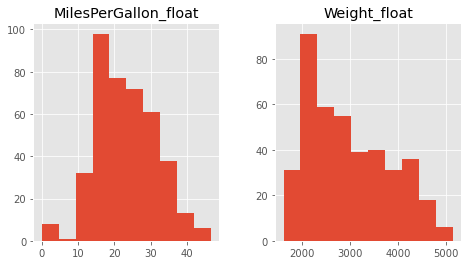

<Figure size 432x288 with 0 Axes>

In [123]:
cars_df[['MilesPerGallon_float','Weight_float']].hist(layout=(1, 3), figsize=(12, 4));
plt.show()
plt.savefig('MilesPerGallon_float')

<AxesSubplot:xlabel='MilesPerGallon_float', ylabel='Weight_float'>

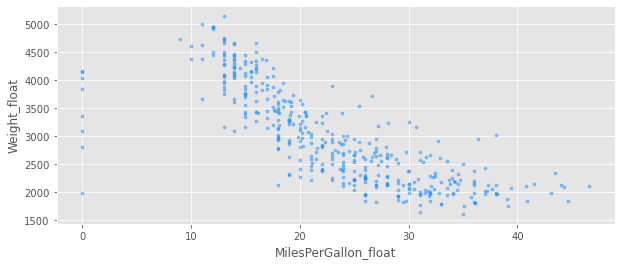

In [124]:
#relationship between MPG and Cylinders
cars_df.plot(kind='scatter', x='MilesPerGallon_float', y='Weight_float', \
        color='dodgerblue', figsize=(10,4), s=10, alpha=0.5) 

### Distributions of the MilesPerGallon and Displacement

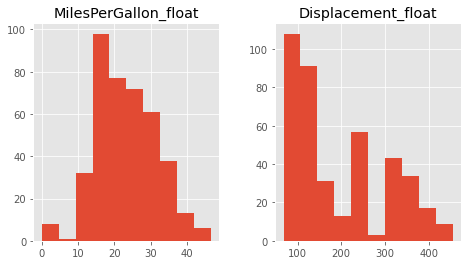

In [125]:
cars_df[['MilesPerGallon_float', 'Displacement_float']].hist(layout=(1, 3), figsize=(12, 4));

<AxesSubplot:xlabel='MilesPerGallon_float', ylabel='Displacement_float'>

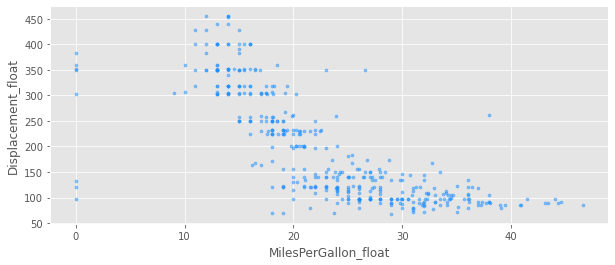

In [126]:
#relationship between MPG and Cylinders
cars_df.plot(kind='scatter', x='MilesPerGallon_float', y='Displacement_float', \
        color='dodgerblue', figsize=(10,4), s=10, alpha=0.5)

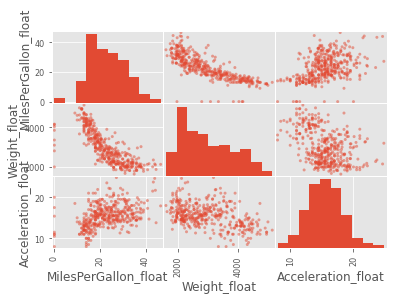

In [127]:
pd.plotting.scatter_matrix(cars_df[['MilesPerGallon_float', 'Weight_float', 'Acceleration_float']]);

### Which Origin has the most cars produced? 

In [128]:
cars_df['Origin'].value_counts().head()

1.0    254
3.0     79
2.0     73
0.0      1
Name: Origin, dtype: int64

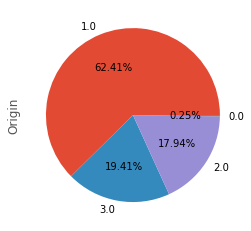

<Figure size 432x288 with 0 Axes>

In [129]:
cars_df['Origin'].value_counts().head().plot(kind='pie',autopct='%1.2f%%') 
plt.show()
plt.savefig('Origin')

### Which ModelYear have the most cars made?

In [130]:
cars_df['ModelYear_float'].value_counts().head()

73.0    40
78.0    36
70.0    35
76.0    34
82.0    31
Name: ModelYear_float, dtype: int64

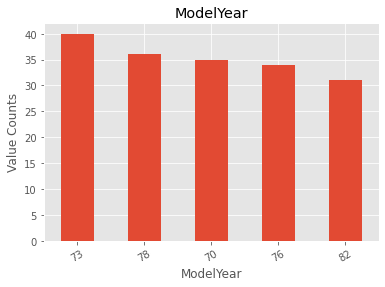

<Figure size 432x288 with 0 Axes>

In [131]:
cars_df['ModelYear'].value_counts().head().plot(kind='bar')
plt.ylabel('Value Counts')
plt.xlabel('ModelYear')
plt.title('ModelYear')
plt.xticks(rotation=30, horizontalalignment="center")
plt.show()
plt.savefig('ModelYear');

### Which  MilesPerGallon have the most Acceleration ?  

In [132]:
# groupby
cars_df.groupby('MilesPerGallon_float')['Acceleration_float'].sum().sort_values(ascending=False)

MilesPerGallon_float
18.0    261.0
13.0    258.7
26.0    234.4
14.0    233.5
15.0    217.4
        ...  
14.5     12.8
23.5     12.6
23.7     12.5
32.7     11.4
28.8     11.3
Name: Acceleration_float, Length: 130, dtype: float64

### Which MilesPerGallon have the most Horsepower?

In [133]:
cars_df.groupby('MilesPerGallon_float')['Horsepower_float'].sum().sort_values(ascending=False)

MilesPerGallon_float
14.0    3191.0
13.0    3167.0
15.0    2247.0
16.0    1839.0
18.0    1750.0
         ...  
43.1      48.0
43.4      48.0
44.3      48.0
23.6       0.0
40.9       0.0
Name: Horsepower_float, Length: 130, dtype: float64